In [2]:
# Sales Analysis 
# Customer perference analysis
#Predicting order quality using linear regression
# KNN algorithm for customer segments based on orders

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

file_path = './chipotle.csv'
chipotle_data = pd.read_csv(file_path, delimiter='\t')  
chipotle_data.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
# Convert 'item_price' to numerical format
chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$', '').astype(float)

In [10]:
sales_analysis = chipotle_data.groupby('item_name').agg(
    Total_Orders=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)
sales_analysis.head()

,item_name,Total_Orders,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04


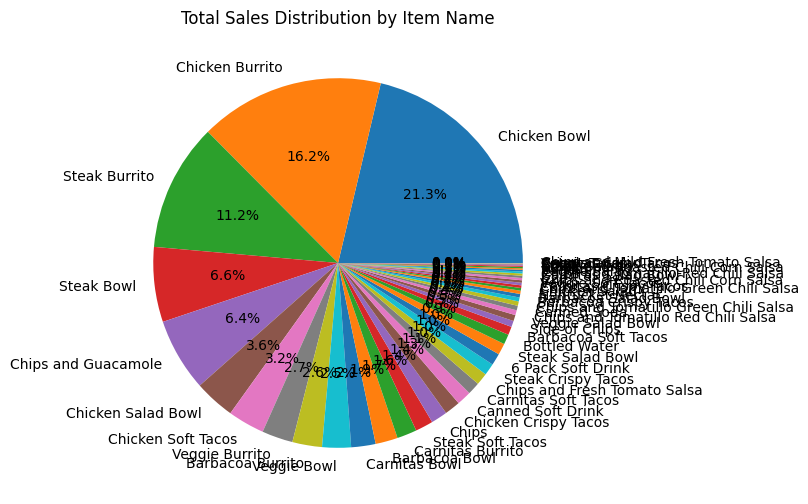

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(
    sales_analysis['Total_Sales'],  # Corrected column name here
    labels=sales_analysis['item_name'],
    autopct='%1.1f%%'  # Display percentages with 1 decimal place
)
plt.title('Total Sales Distribution by Item Name')
plt.show()


In [16]:
# Analyze the choice_description for popular items
popular_items = sales_analysis.head(5)['item_name']
chipotle_data[chipotle_data['item_name'].isin(popular_items)].groupby('item_name')['choice_description'].value_counts().head(10)


item_name     choice_description                                                               
Chicken Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                      17
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]    14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]               14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                    13
              [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                        13
              [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                            13
              [Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]              12
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                        11
              [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                  

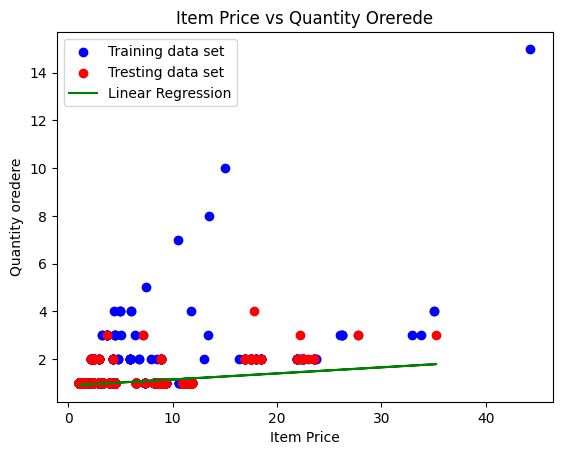

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

order_data=chipotle_data[['item_price']]
order_quantity =chipotle_data['quantity']

lin_reg = LinearRegression()
lin_reg.fit(order_data,order_quantity)

X_train,X_test,Y_train,Y_test = train_test_split(order_data,order_quantity,test_size=0.2,random_state=42)
y_pred=lin_reg.predict(X_test)

plt.scatter(X_train,Y_train,color='blue',label='Training data set')
plt.scatter(X_test,Y_test,color='red',label='Tresting data set')
plt.plot(X_test,y_pred,color='green',label='Linear Regression')
plt.xlabel("Item Price")
plt.ylabel("Quantity oredere")
plt.title("Item Price vs Quantity Orerede")
plt.legend()
plt.show()


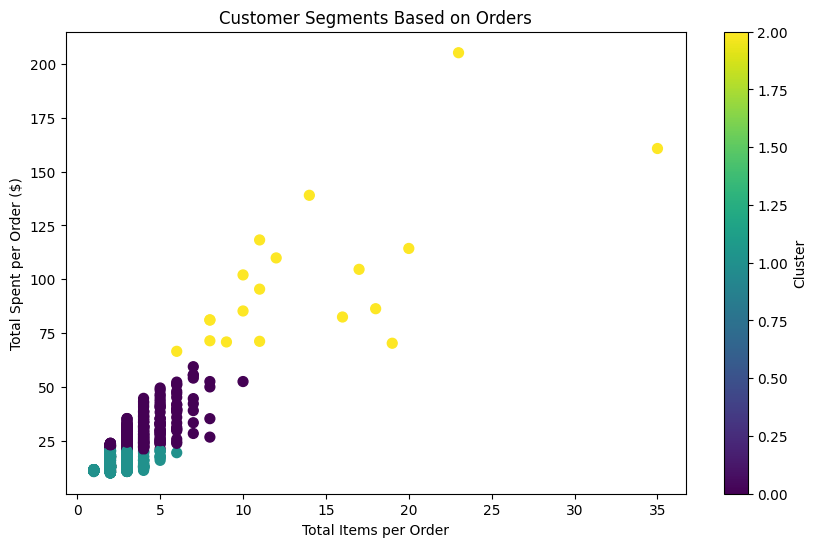

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Prepare the order data by aggregating total items and total spent per order
order_data = chipotle_data.groupby('order_id').agg(
    Total_items=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_spent=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index()

# Step 2: Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Added random_state for reproducibility
order_segment = kmeans.fit_predict(order_data[['Total_items', 'Total_spent']])

# Step 3: Plot scatter plot with colors for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(order_data['Total_items'], order_data['Total_spent'], c=order_segment, cmap='viridis', s=50)  # 'c' parameter added for colors
plt.xlabel('Total Items per Order')
plt.ylabel('Total Spent per Order ($)')
plt.title('Customer Segments Based on Orders')
plt.colorbar(label='Cluster')  # Adds a color bar to indicate cluster labels
plt.show()
